In [167]:
# Importing libraries
import numpy as np
import pandas as pd
import datetime
# plotting modules
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import chardet
import matplotlib as mpl
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [168]:
dataframe=pd.read_csv('Bondora_raw.zip')


In [169]:
dataframe.shape

(134529, 112)

In [170]:
dataframe.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0  2009-06-16      2010-07-06       2009-07-27            2010-06-25   
1  2009-06-15      2009-07-07       2009-07-15            2009-07-15   
2  2009-06-15             NaN       2009-07-27            2011-02-25   
3  2009-06-15      2010-09-15       2009-07-15            2010-09-15   
4  2009-06-14      2016-07-28       2009-07-27            2010-06-25   

  MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0        2010-06-25                     17                         5   
1        2009-07-15                     20                         4   
2        2014-05-13                     20                         6   
3        2010-09-15                     12                         7   
4        2010-06-25                     10                         4   

   VerificationType  LanguageCode  Age DateOfBirth  Gender Country  \
0               2.0             1   61  1947-11-26     1.0      EE   
1               2.0             1   48  1960-11-05     1.0      EE   
2               2.0             1   58  1950-11-13     1.0      EE   
3               2.0             1   23  1986-03-29     1.0      EE   
4               2.0             1   25  1983-09-30     1.0      EE   

   AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment    County  \
0       319.5582  115.0408      30.0            12             NaN     HARJU   
1       191.7349  140.6057      25.0             1             NaN  IDA-VIRU   
2       319.5582  319.5409      25.0            20             NaN     PÄRNU   
3       127.8233   57.5205      45.0            15             NaN     HARJU   
4       319.5582  319.5436      30.0            12             NaN     TARTU   

           City  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0       TALLINN          7        3.0            1.0              0   
1  KOHTLA-JARVE          7        5.0            4.0              0   
2         PÄRNU          2        4.0            1.0              0   
3      PALDISKI          0        2.0            3.0              1   
4         TARTU          6        4.0            2.0              0   

   EmploymentStatus EmploymentDurationCurrentEmployer  \
0               3.0                        UpTo3Years   
1               3.0                    MoreThan5Years   
2               3.0                        UpTo4Years   
3               NaN                        UpTo2Years   
4               3.0                        UpTo2Years   

          EmploymentPosition   WorkExperience  OccupationArea  \
0          klienditeenindaja  MoreThan25Years             7.0   
1  Õppealaj

In [171]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [172]:
dataframe.isnull().sum()


ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [173]:
##Filling Null values

In [174]:
#Nulls in categorical features
objects=dataframe.select_dtypes("object")
objects.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
ListedOnUTC                                0
BiddingStartedOn                           0
UserName                                   0
LoanApplicationStartedDate                 0
LoanDate                                   0
ContractEndDate                        75546
FirstPaymentDate                           0
MaturityDate_Original                      0
MaturityDate_Last                          0
DateOfBirth                                0
Country                                    0
County                                 36840
City                                    9794
NrOfDependants                         98929
EmploymentDurationCurrentEmployer        876
EmploymentPosition                     98439
WorkExperience                         98007
LastPaymentOn                           9531
DebtOccuredOn                          86011
DebtOccuredOnForSecondary              82279
DefaultDat

In [175]:
objects=objects.fillna("empty")
objects.isnull().sum()

ReportAsOfEOD                         0
LoanId                                0
ListedOnUTC                           0
BiddingStartedOn                      0
UserName                              0
LoanApplicationStartedDate            0
LoanDate                              0
ContractEndDate                       0
FirstPaymentDate                      0
MaturityDate_Original                 0
MaturityDate_Last                     0
DateOfBirth                           0
Country                               0
County                                0
City                                  0
NrOfDependants                        0
EmploymentDurationCurrentEmployer     0
EmploymentPosition                    0
WorkExperience                        0
LastPaymentOn                         0
DebtOccuredOn                         0
DebtOccuredOnForSecondary             0
DefaultDate                           0
StageActiveSince                      0
Rating                                0


In [176]:
dataframe=dataframe.drop(objects, axis=1)


In [177]:
#nulls in numerical features
dataframe.isnull().sum()

LoanNumber                                    0
BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
                                          ...  
PreviousEarlyRepaymentsCountBeforeLoan        0
NextPaymentNr                             36741
NrOfScheduledPayments                     36741
PrincipalDebtServicingCost                75400
InterestAndPenaltyDebtServicingCost       75400
Length: 73, dtype: int64

In [178]:
dataframe=dataframe.fillna(method="bfill", axis =0)
dataframe.isnull().sum()

LoanNumber                                0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
                                         ..
PreviousEarlyRepaymentsCountBeforeLoan    0
NextPaymentNr                             0
NrOfScheduledPayments                     0
PrincipalDebtServicingCost                0
InterestAndPenaltyDebtServicingCost       0
Length: 73, dtype: int64

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def EncodingCategoricals(columns ,dataframe):
    for c in columns:
        dataframe[c]=le.fit_transform(dataframe[c].astype(str))

In [180]:
EncodingCategoricals(objects.columns,objects)
objects.head()

ReportAsOfEOD  LoanId  ListedOnUTC  BiddingStartedOn  UserName  \
0              0  126285          160               160     63416   
1              0   79501          157               157     65228   
2              0  123113          150               150         8   
3              0  108353          165               165       116   
4              0   77630          155               155     63431   

   LoanApplicationStartedDate  LoanDate  ContractEndDate  FirstPaymentDate  \
0                         160        83              169                35   
1                         157        82                9                32   
2                         150        82             3944                35   
3                         165        82              209                32   
4                         155        81             1614                35   

   MaturityDate_Original  MaturityDate_Last  DateOfBirth  Country  County  \
0                    158                157          246        0     234   
1                     18                 18         3911        0     283   
2                    279                752          913        0     732   
3                    197                194        12990        0     234   
4                    158                157        12085        0     856   

   City  NrOfDependants  EmploymentDurationCurrentEmployer  \
0  6398               0                                  6   
1  2709               0                                  0   
2  5188               0                                  7   
3  4689               2                                  5   
4  6446               0                                  5   

   EmploymentPosition  WorkExperience  LastPaymentOn  DebtOccuredOn  \
0                2398               5            172           1512   
1                3186               5             11           1512   
2                2953               5            617             84   
3                2316               2            212           1512   
4                2398               3           1323           1512   

   DebtOccuredOnForSecondary  DefaultDate  StageActiveSince  Rating  \
0                       1553         1617             47296       8   
1                       1553         1617             47296       8   
2                        107          274                 6       8   
3                       1553         1617             47296       8   
4                          8           11             47296       8   

   Rating_V0  Rating_V1  Rating_V2  Status  ActiveLateCategory  \
0          8          8          8       2                   9   
1          8          8          8       2                   9   
2          8          8          8       1                   4   
3          8          8          8       2                   9   
4          8          8          8       2                   9   

   WorseLateCategory  CreditScoreEsMicroL  CreditScoreEsEquifaxRisk  \
0                  8                   11                         6   
1                  9                   11                         6   
2                  4                   11                         6   
3                  5                   11                         6   
4                  4                   11                         6   

   CreditScoreFiAsiakasTietoRiskGrade  GracePeriodStart  GracePeriodEnd  \
0                                  21               991            1239   
1                                  21               991            1239   
2                                  21               991            1239   
3                                  21               991            1239   
4                                  21               991            1239   

   NextPaymentDate  ReScheduledOn  ActiveLateLastPaymentCategory  
0               26           1700                              9  
1               26  

<AxesSubplot:>

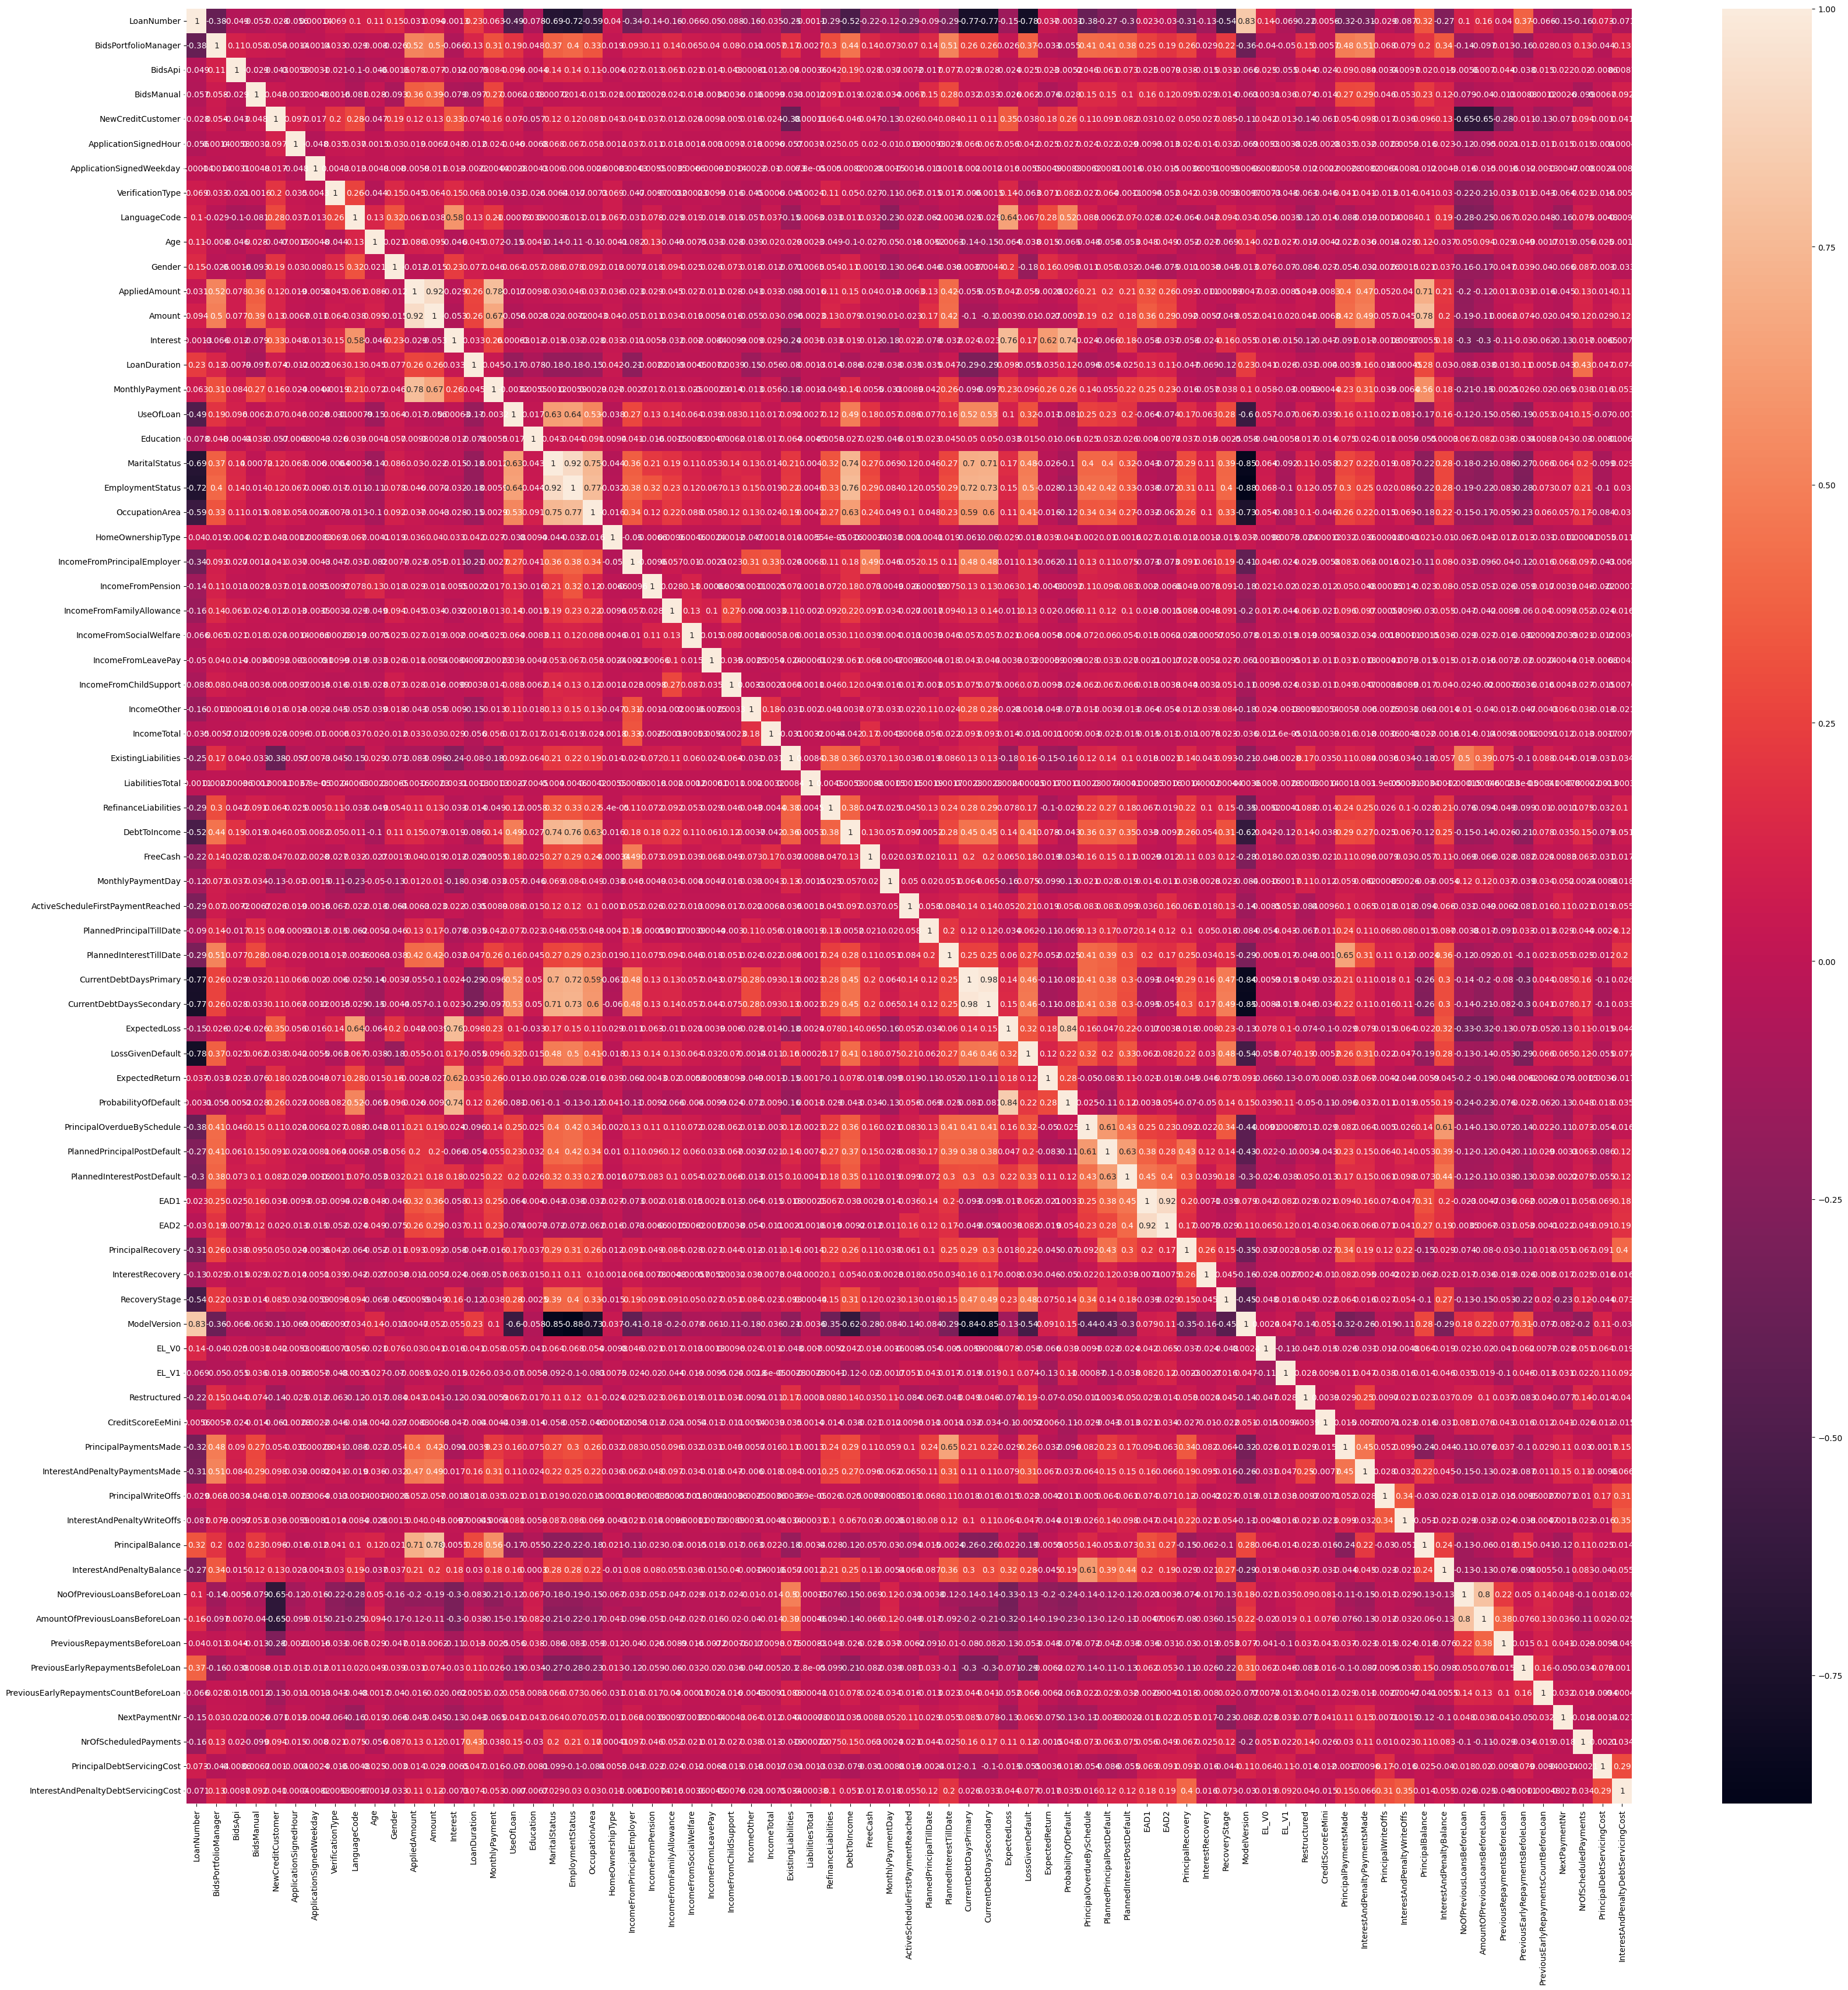

In [181]:
plt.figure(figsize=(40,40))
sns.heatmap(dataframe.corr(),annot=True)

In [182]:
print(dataframe.corr())


                                        LoanNumber  BidsPortfolioManager  \
LoanNumber                                1.000000             -0.384473   
BidsPortfolioManager                     -0.384473              1.000000   
BidsApi                                  -0.048516              0.105199   
BidsManual                               -0.056821              0.057949   
NewCreditCustomer                        -0.028044              0.054073   
...                                            ...                   ...   
PreviousEarlyRepaymentsCountBeforeLoan   -0.066368              0.027525   
NextPaymentNr                            -0.145518              0.029984   
NrOfScheduledPayments                    -0.158804              0.126987   
PrincipalDebtServicingCost                0.072947             -0.043639   
InterestAndPenaltyDebtServicingCost      -0.070605              0.127722   

                                         BidsApi  BidsManual  \
LoanNumber             

In [183]:
dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)


In [184]:
##Handling Outliers

<AxesSubplot:>

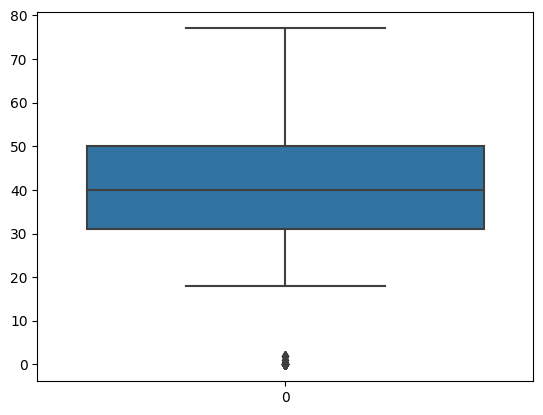

In [185]:
sns.boxplot(dataframe['Age'])


In [186]:
dataframe['Age'].describe()


count    134529.000000
mean         40.819295
std          12.348693
min           0.000000
25%          31.000000
50%          40.000000
75%          50.000000
max          77.000000
Name: Age, dtype: float64

In [187]:
print(np.where(dataframe['Age']>70))


(array([  164,   173,  1923,  8785,  8806, 30395, 32924, 32988, 39046,
       39268, 40715, 40770, 50330], dtype=int64),)


<AxesSubplot:>

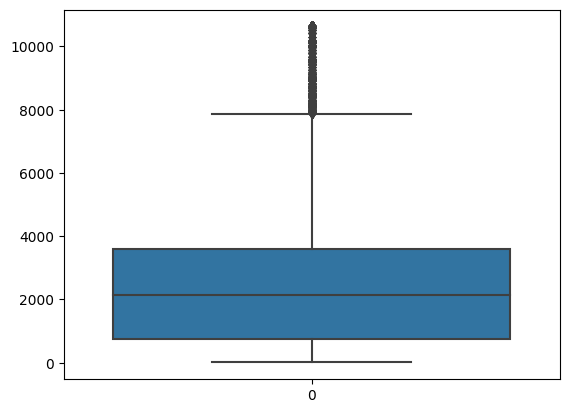

In [188]:
sns.boxplot(dataframe['Amount'])


In [189]:
dataframe['Amount'].describe()


count    134529.000000
mean       2543.872472
std        2170.128183
min           6.390000
25%         744.000000
50%        2125.000000
75%        3600.000000
max       10632.000000
Name: Amount, dtype: float64

In [190]:
print(np.where(dataframe['Amount']>2543.872472))


(array([   468,    493,    527, ..., 134525, 134527, 134528], dtype=int64),)


In [191]:
pcntile25 = dataframe['Amount'].quantile(0.25)
pcntile75 = dataframe['Amount'].quantile(0.75)
iqr = pcntile75 - pcntile25

In [192]:
U_P = pcntile75 + 1.5 * iqr
L_P = pcntile25 - 1.5 * iqr
print('U_P=',U_P)
print('L_P=',L_P)

U_P= 7884.0
L_P= -3540.0


In [193]:
records_beyond_U_P = dataframe['Amount'] >= U_P
print(np.where(records_beyond_U_P))

(array([   542,    587,    614, ..., 134422, 134436, 134499], dtype=int64),)


In [194]:
dataframe.columns


Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedPrincipalTillDate',
       'PlannedInterestTillDate', 'CurrentDebtDaysPrimary',
       'CurrentDebtDaysSecondary', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Pri

In [196]:
dataframe.columns

Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedPrincipalTillDate',
       'PlannedInterestTillDate', 'CurrentDebtDaysPrimary',
       'CurrentDebtDaysSecondary', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Pri

In [217]:
##PCA

In [218]:
features=["PrincipalBalance","PrincipalPaymentsMade","Amount"]
X = dataframe.copy()
y = X.pop('PrincipalWriteOffs')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [219]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()


PC1       PC2       PC3
0 -1.478085 -0.221935 -0.001303
1 -1.465989 -0.203499 -0.001420
2 -1.359582 -0.174492 -0.001689
3 -1.505300 -0.263415 -0.001040
4 -1.381328 -0.074459 -0.002239

In [220]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3
PrincipalBalance       0.655178 -0.433780 -0.618528
PrincipalPaymentsMade  0.186182  0.886186 -0.424277
Amount                 0.732173  0.162819  0.661372

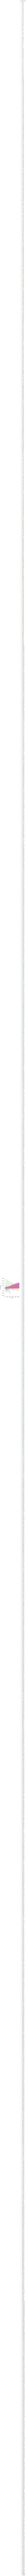

In [224]:
sns.lmplot(x="Amount", y="PrincipalBalance", hue="PrincipalWriteOffs", data=dataframe)


In [225]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

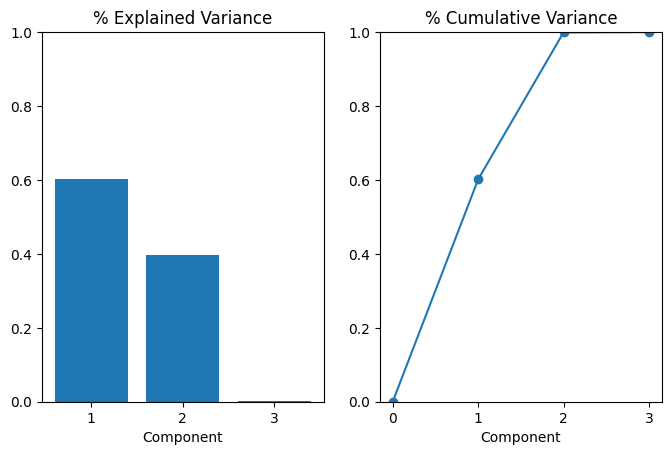

In [226]:
plot_variance(pca)
